![title](image/ntu_logo.png)

# CZ1015 MiniProject: Introduction to Data Science and Artificial Intelligence

# Accidental Aviation Dataset Report
- A program coded in Python that analysis accidents characteristics using AccidentalAviation dataset. It is containing different accidents with respect to various different factors  

Made by: 

### Tran Anh Tai - U1820351C

### Sim Tian Quan - U1921887D

### Muhammad Nasran Hamza - U1921348G

### Kundu Kousani - U1922997B

### Group: FS406

# Problem Statement(s)

## 1. Investment of manufacture in terms of structure design (make, engine type, number of 

## engines, etc.)

## 2. Considering why famlilies choose to stay in places even with high accident frequencies.

## 3. Navigating clustering/ classification as  showing similar trends grouped together with 

## another problems. 

# Importing all important libraries required for data exploration

In [2]:
# Importing all the project pre-requisites
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Import the Accidental Aviation Dataset

Vital statistics of the dataset using type and shape attribute

In [35]:
data = pd.read_csv("./data/AviationData.csv")

print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (84262, 31)


# Basic statistics

Get top 5 records in the dataset

In [4]:
# get the overview of the dataset
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,8/1/2020
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2/1/2020
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,12/28/2019,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,3/1/2020


Accidental DataFrame general information 

In [5]:
# data general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84262 entries, 0 to 84261
Data columns (total 31 columns):
Event.Id                  84262 non-null object
Investigation.Type        84257 non-null object
Accident.Number           84262 non-null object
Event.Date                84262 non-null object
Location                  84185 non-null object
Country                   83755 non-null object
Latitude                  30163 non-null float64
Longitude                 30154 non-null float64
Airport.Code              47723 non-null object
Airport.Name              50439 non-null object
Injury.Severity           84262 non-null object
Aircraft.Damage           81553 non-null object
Aircraft.Category         27508 non-null object
Registration.Number       80412 non-null object
Make                      84192 non-null object
Model                     84163 non-null object
Amateur.Built             83653 non-null object
Number.of.Engines         79228 non-null float64
Engine.Type             

Data basic statistics information 

In [6]:
# data statistics description
data.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,30163.000000,30154.000000,79228.000000,57059.000000,54384.000000,55592.000000,69673.000000
mean,37.544907,-93.508337,1.146930,0.847614,0.331715,0.518708,5.901325
std,12.370282,39.454412,0.447004,6.292468,1.375602,2.771339,29.534302
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.307778,-114.861042,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.125278,-94.371667,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.524723,-81.650278,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,179.618611,8.000000,349.000000,111.000000,380.000000,699.000000


# Exploratory Data Analysis / Visualizatio

## Importing and cleaning the dataset

In [36]:
clean_data =  pd.DataFrame(data)

# convert all Column Names to UPPERCASE
clean_data.columns = clean_data.columns.str.upper()
# remove all dots from the Column Names
clean_data.columns = clean_data.columns.str.replace(".", '_')
# remove duplicate columns (if any)
clean_data = clean_data.loc[:, ~data.columns.duplicated()]
# remove any mising values from rows
clean_data  = clean_data.dropna(how = 'any', axis = 0)
# after removing missing values, reset the index
clean_data = data.reset_index(drop = True)

clean_data.head()

,EVENT_ID,INVESTIGATION_TYPE,ACCIDENT_NUMBER,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,...,PURPOSE_OF_FLIGHT,AIR_CARRIER,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT,REPORT_STATUS,PUBLICATION_DATE
0,20200102X82407,Accident,WPR20CA055,12/31/2019,"Elk, CA",United States,39.128611,-123.715833,LLR,Little River,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,13/01/2020
1,20191231X83852,Accident,CEN20FA049,12/31/2019,"OLATHE, KS",United States,38.846111,-94.736111,OJC,Johnson County Executive,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,8/1/2020
2,20200102X54844,Accident,ANC20CA011,12/31/2019,"Fairbanks, AK",United States,64.666945,-148.133334,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Preliminary,2/1/2020
3,20191230X91852,Accident,CEN20CA048,12/30/2019,"GRANBURY, TX",United States,32.365556,-97.645000,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,31/12/2019
4,20191228X62945,NaN,WPR20CA053,12/28/2019,"Missoula, MT",United States,NaN,NaN,MSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,3/1/2020


Description of the Dataset

### finish up for me!!!

In [34]:
location_data = dict(type = 'choropleth', 
                     locations = clean_data['LOCATION'],
                     locationmode = 'country names',
                     colorscale = 'Reds'
                     )
layout = dict(title = 'Locations', geo = dict(showframe = False, projection = {'type' : 'mercator'}))
chronomap = go.Figure(data = [location_data], layout = layout)
iplot(chronomap)

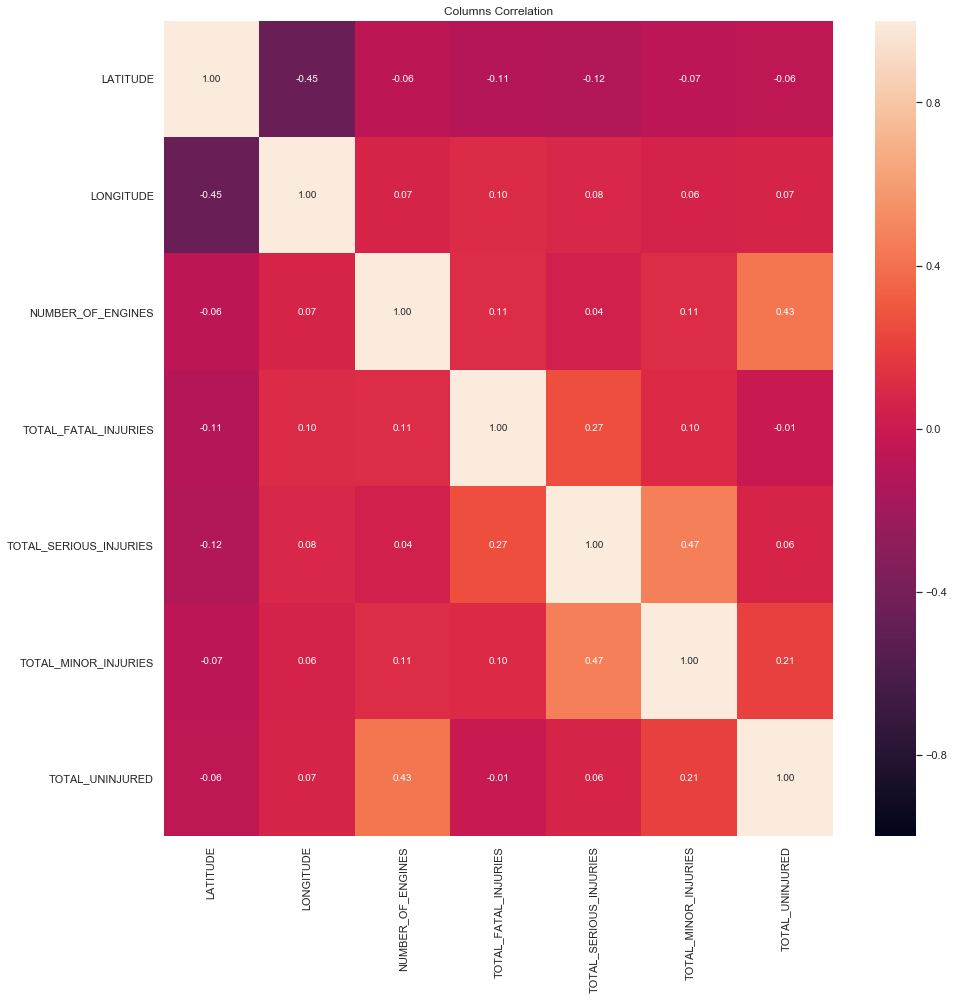

In [39]:
f, axes = plt.subplots(1, 1, figsize = (15, 15))
plt.title("Columns Correlation")
sb.heatmap(clean_data.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f')

# Problem: (just  the skeleton now, the statement and defined problems could 

# be change later )

# 1.  Investment of manufacture in terms of structure design (make, engine 

# type, number of engine etc)  


# 2. Considering why famlilies choose to stay in places even with high 

# accident frequencies.

# 3. Navigating clustering/ classification as  showing similar trends grouped 

# together with another problems. 